In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro

In [2]:
chain_rg_ree=pd.read_csv('varying_epas_chain_length_100_master_out.csv')
chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
chain_rg_ree=chain_rg_ree[chain_rg_ree.chain_length<=200]
chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5


In [3]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [4]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [5]:
chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
0,10000,0.0,50,0.0,11.7236,1.0784,14.1504,64.0,16.0,121.0,201.0,26.9524,7.457592,4.1092,-13.0720,0.446840
1,20000,0.0,50,0.0,18.1300,2.8756,2.2084,169.0,36.0,36.0,241.0,23.2140,10.381666,15.5880,0.6672,0.671953
2,30000,0.0,50,0.0,2.4644,1.9204,5.2500,16.0,9.0,0.0,25.0,9.6348,2.594761,-1.1208,-3.3296,0.321095
3,40000,0.0,50,0.0,1.8576,8.1664,2.6804,0.0,25.0,4.0,29.0,12.7044,2.282674,-3.5658,5.4860,0.467578
4,50000,0.0,50,0.0,7.9396,4.0064,3.6304,100.0,16.0,25.0,141.0,15.5764,9.052156,4.1212,0.3760,0.265404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180085,200060000,0.8,50,83.2,1.2644,0.9424,1.8000,1.0,4.0,0.0,5.0,4.0068,1.247879,-0.1068,-0.8576,0.187267
180086,200070000,0.8,50,81.6,0.7584,1.4800,1.5876,1.0,0.0,0.0,1.0,3.8260,0.261370,-0.7754,-0.1076,0.204124
180087,200080000,0.8,50,89.6,0.9200,1.2100,1.4704,4.0,1.0,0.0,5.0,3.6004,1.388735,-0.4202,-0.2604,0.132455
180088,200090000,0.8,50,78.4,1.0276,1.0004,1.5044,4.0,9.0,4.0,17.0,3.5324,4.812592,-0.2248,-0.5040,0.138989


# check what the data look like. make sure the frames are equilibrated

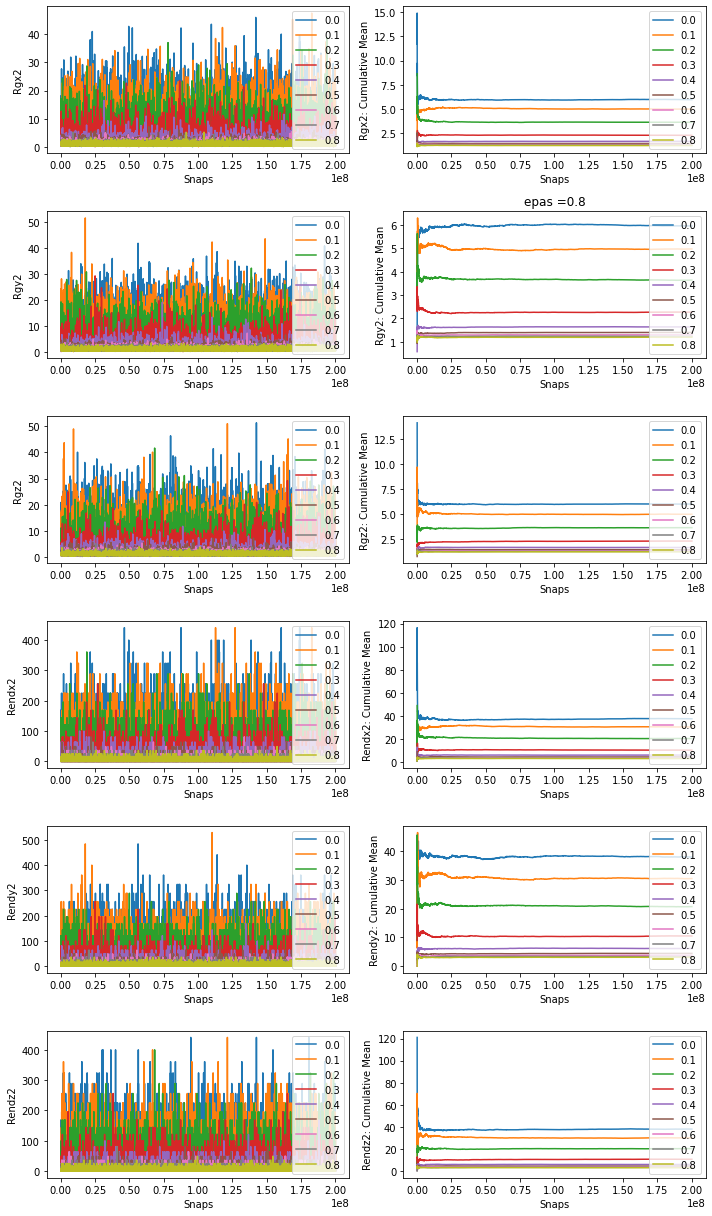

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for epas in chain_rg_ree.epas.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rgx.values,label=str(epas))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rgx.values),label=str(epas))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rgy.values,label=str(epas))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rgy.values),label=str(epas))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('epas ='+str(epas))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rgz.values,label=str(epas))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rgz.values),label=str(epas))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rendx.values,label=str(epas))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rendx.values),label=str(epas))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rendy.values,label=str(epas))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rendy.values),label=str(epas))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                chain_rg_ree[chain_rg_ree.epas==epas].Rendz.values,label=str(epas))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.epas==epas].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.epas==epas].Rendz.values),label=str(epas))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [3]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
epas_considered = chain_rg_ree.epas.unique()
blank_df = pd.DataFrame()
for epas in chain_rg_ree.epas.unique():
    if epas in epas_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.epas==epas].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.epas==epas].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [8]:
equil_chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
2001,20020000,0.0,50,0.0,6.6596,2.9444,2.4004,16.0,36.0,1.0,53.0,12.0044,4.415048,3.9872,0.5440,0.334455
2002,20030000,0.0,50,0.0,1.6164,2.4004,13.5444,4.0,0.0,25.0,29.0,17.5612,1.651368,-6.3560,-11.1440,0.658040
2003,20040000,0.0,50,0.0,13.0324,1.4884,8.4116,49.0,1.0,81.0,131.0,22.9324,5.712442,8.0824,-6.9232,0.438831
2004,20050000,0.0,50,0.0,2.9184,11.2336,3.0100,9.0,49.0,1.0,59.0,17.1620,3.437828,-4.2034,8.2236,0.481866
2005,20060000,0.0,50,0.0,3.2064,1.6000,3.7844,36.0,16.0,1.0,53.0,8.5908,6.169391,0.5142,-2.1844,0.228196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180085,200060000,0.8,50,83.2,1.2644,0.9424,1.8000,1.0,4.0,0.0,5.0,4.0068,1.247879,-0.1068,-0.8576,0.187267
180086,200070000,0.8,50,81.6,0.7584,1.4800,1.5876,1.0,0.0,0.0,1.0,3.8260,0.261370,-0.7754,-0.1076,0.204124
180087,200080000,0.8,50,89.6,0.9200,1.2100,1.4704,4.0,1.0,0.0,5.0,3.6004,1.388735,-0.4202,-0.2604,0.132455
180088,200090000,0.8,50,78.4,1.0276,1.0004,1.5044,4.0,9.0,4.0,17.0,3.5324,4.812592,-0.2248,-0.5040,0.138989


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


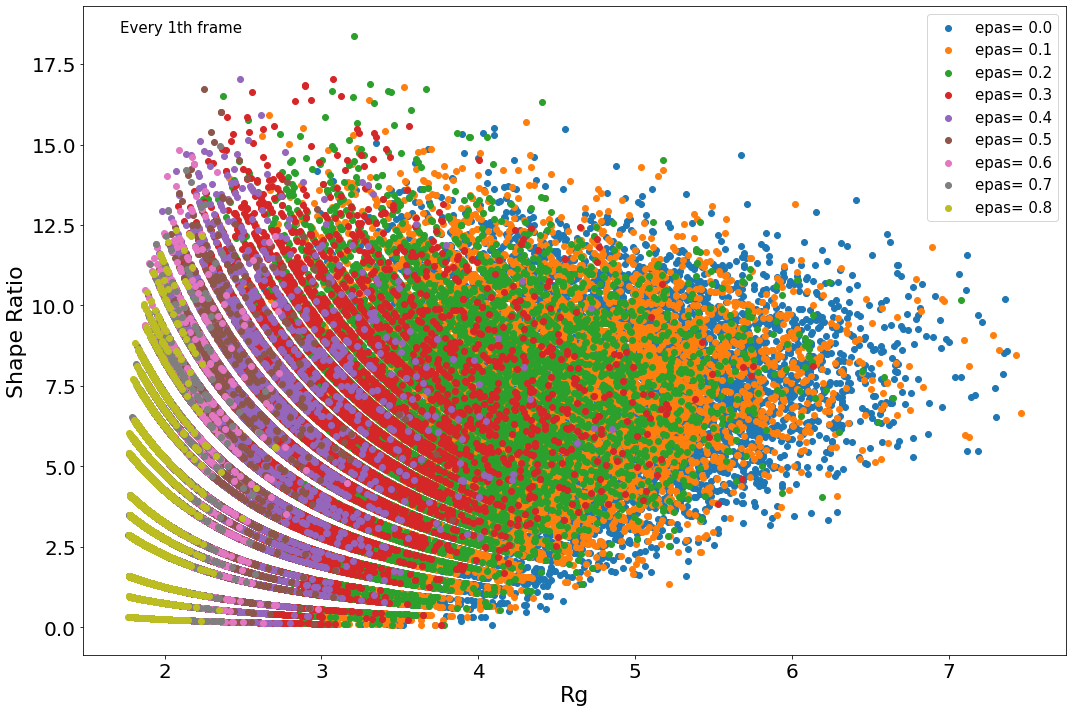

In [9]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.epas.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame].ratio.values,
            label='epas= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


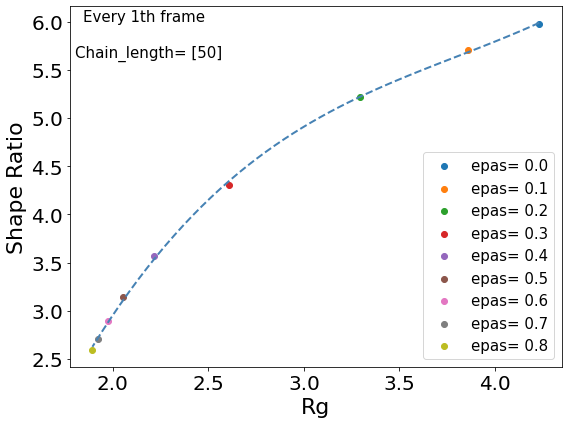

In [10]:
#use i-1 because there are i-1 bonds
fig,ax = plt.subplots(figsize=(8,6))
every_ith_frame=1
for i in equil_chain_rg_ree.epas.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame].ratio.values.mean(),
            label='epas= '+str(i))
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
x=np.array([(equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5 for i in equil_chain_rg_ree.epas.unique()])
y=np.array([equil_chain_rg_ree[equil_chain_rg_ree.epas==i].iloc[::every_ith_frame].ratio.values.mean() for i in equil_chain_rg_ree.epas.unique()])
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
ax.plot(x_new, y_new, color='steelblue', linestyle='--', linewidth=2)
ax.text(0.15,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
ax.text(0.16,0.86,'Chain_length= '+str(equil_chain_rg_ree.chain_length.unique()),fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
#ax.text(1.6, 6, 'y = ' + '{:.02f}'.format(b) + ' + {:.02f}'.format(a) + 'x', size=14,fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


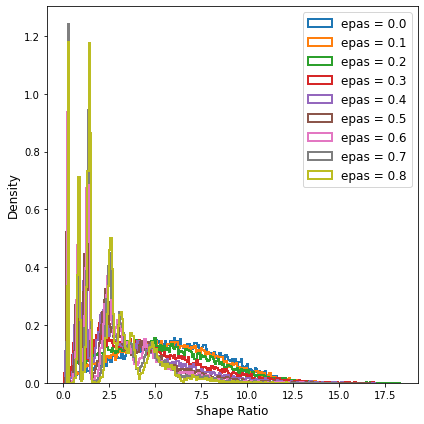

In [13]:
fig = plt.subplots(figsize=(6,6))
for epas in equil_chain_rg_ree.epas.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].ratio.values,
             label='epas = '+str(epas),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].ratio.values.min(),
                                        equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].ratio.values.max(),0.07),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


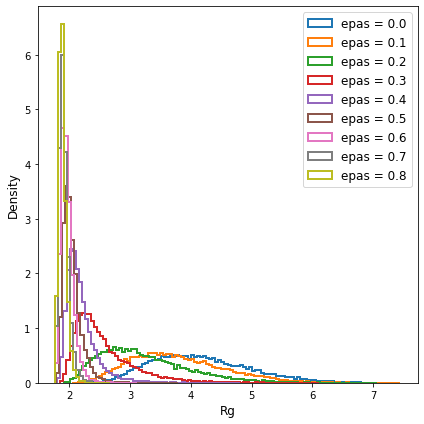

In [14]:
fig = plt.subplots(figsize=(6,6))
for epas in equil_chain_rg_ree.epas.unique():
    n,bins,patches=plt.hist((equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].Rg2.values)**0.5,
             label='epas = '+str(epas),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].Rg2.values)**0.5).min(),
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.epas==epas].Rg2.values)**0.5).max(),0.05),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [15]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 5.68 with standard deviation  2.63
The mean shape ratio for chain length  50  is 5.71 with standard deviation  2.76
The mean shape ratio for chain length  75  is 5.73 with standard deviation  2.78
The mean shape ratio for chain length  100  is 5.75 with standard deviation  2.84
The mean shape ratio for chain length  125  is 5.81 with standard deviation  2.83
The mean shape ratio for chain length  150  is 5.78 with standard deviation  2.88


In [20]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.38 with standard deviation  0.17
The mean RSA for chain length  50  is 0.37 with standard deviation  0.17
The mean RSA for chain length  75  is 0.37 with standard deviation  0.17
The mean RSA for chain length  100  is 0.37 with standard deviation  0.17
The mean RSA for chain length  125  is 0.37 with standard deviation  0.17
The mean RSA for chain length  150  is 0.37 with standard deviation  0.17


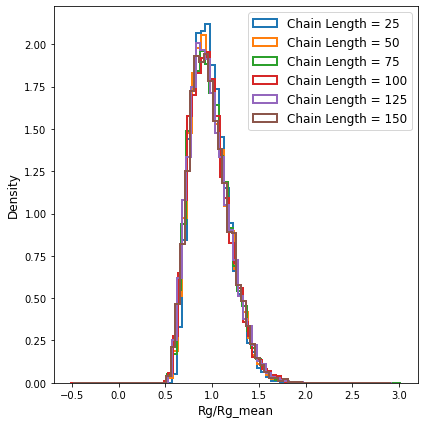

In [23]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# no need beyond this point

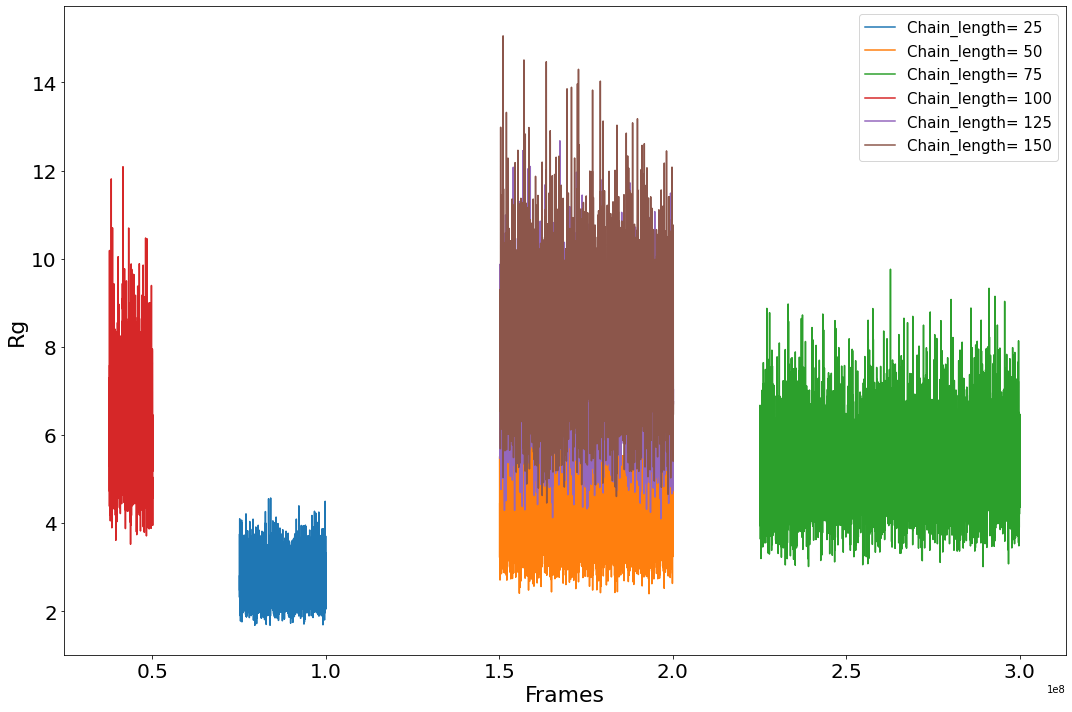

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

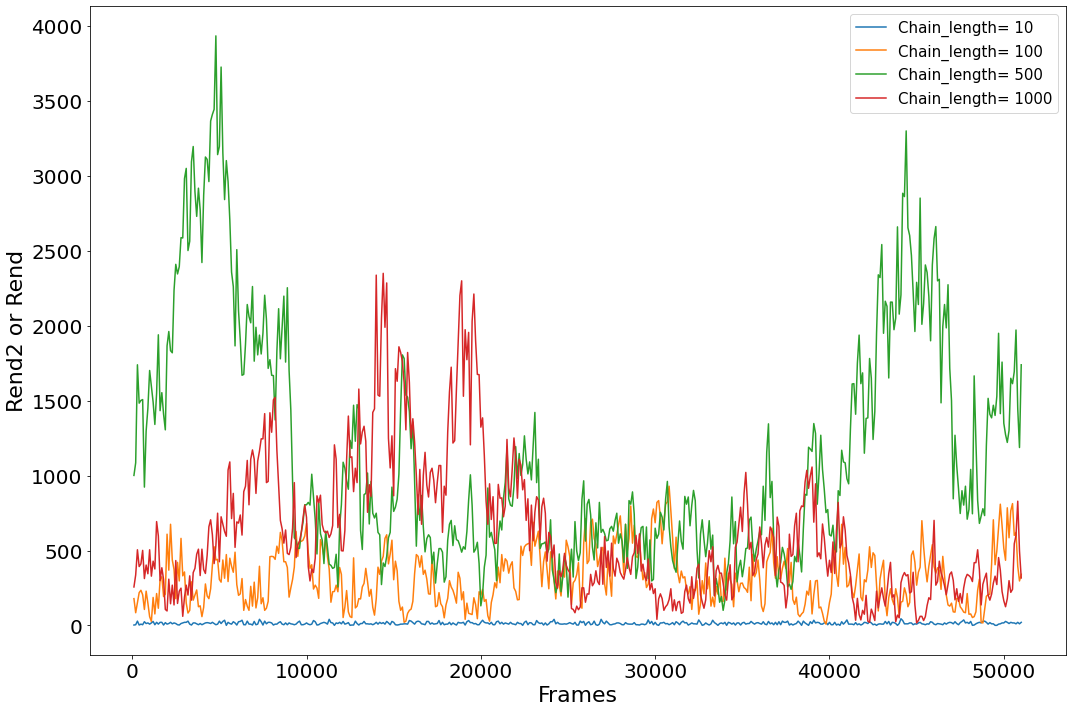

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

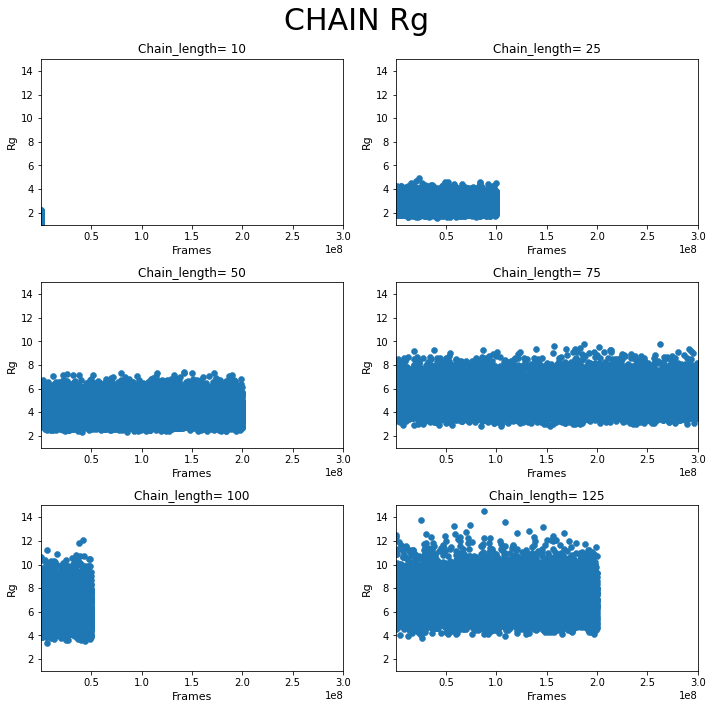

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


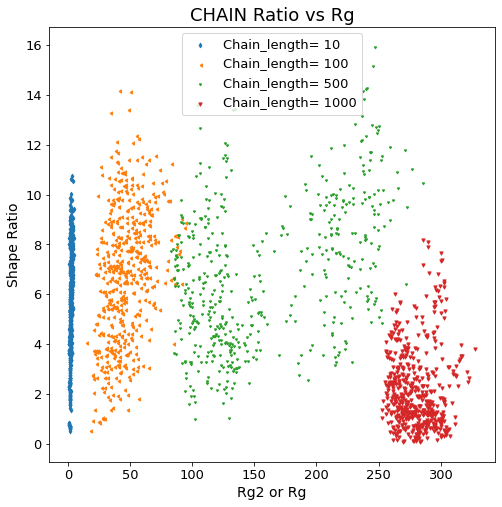

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain